Load the data

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
# import fiona
from bs4 import BeautifulSoup

In [2]:
import os
import pykml

In [3]:
os.chdir("./Dataset")

In [4]:
from pykml import parser

In [5]:
with open("Building_Footprint.kml",'r', encoding="utf-8") as f:
    root = parser.parse(f).getroot()
    
places = []
for place in root.Document.Folder.Placemark:
    data = {item.get("name"):item.text for item in place.ExtendedData.SchemaData.SimpleData}
    coords = place.MultiGeometry.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
    data["Coordinates"] = coords
    places.append(data)
    
df = pd.DataFrame(places)
df.head() 

tessellate extrude visibility               id   fid       layer  \
0         -1       0         -1    cugir009034.3  7624  clip_Bronx   
1         -1       0         -1    cugir009034.4  7625  clip_Bronx   
2         -1       0         -1    cugir009034.5  7626  clip_Bronx   
3         -1       0         -1    cugir009034.6  7627  clip_Bronx   
4         -1       0         -1  cugir009034.142  7829  clip_Bronx   

                                                path  \
0  /Users/killo/Desktop/Clip_Bronx.kml|layername=...   
1  /Users/killo/Desktop/Clip_Bronx.kml|layername=...   
2  /Users/killo/Desktop/Clip_Bronx.kml|layername=...   
3  /Users/killo/Desktop/Clip_Bronx.kml|layername=...   
4  /Users/killo/Desktop/Clip_Bronx.kml|layername=...   

                                         Coordinates  
0  -73.919029,40.848199 -73.919329,40.847953 -73....  
1  -73.921952,40.849629 -73.921911,40.849679 -73....  
2  -73.920502,40.850113 -73.920453,40.850167 -73....  
3  -73.92056,40.851403 -73.920531,40.851445 -73.9...  
4  -73.912343,40.852184 -73.912472,40.852098 -73....

In [6]:
df.tail()

tessellate extrude visibility                id      fid           layer  \
9431         -1       0         -1  cugir009062.5858  4806054  clip_Manhattan   
9432         -1       0         -1  cugir009062.5859  4806055  clip_Manhattan   
9433         -1       0         -1  cugir009062.5860  4806056  clip_Manhattan   
9434         -1       0         -1  cugir009062.5861  4806068  clip_Manhattan   
9435         -1       0         -1  cugir009062.5862  4806069  clip_Manhattan   

                                                   path  \
9431  /Users/killo/Desktop/Clip_Manhattan.kml|layern...   
9432  /Users/killo/Desktop/Clip_Manhattan.kml|layern...   
9433  /Users/killo/Desktop/Clip_Manhattan.kml|layern...   
9434  /Users/killo/Desktop/Clip_Manhattan.kml|layern...   
9435  /Users/killo/Desktop/Clip_Manhattan.kml|layern...   

                                            Coordinates  
9431  -73.952668,40.779232 -73.95254,40.779428 -73.9...  
9432  -73.949638,40.776133 -73.949312,40.776674 -73....  
9433  -73.952102,40.768802 -73.951738,40.769309 -73....  
9434  -73.952297,40.75904 -73.952463,40.759083 -73.9...  
9435  -73.955791,40.763136 -73.956023,40.763121 -73....

In [7]:
import os
os.getcwd()

'd:\\EY Data Challenge 2025\\Dataset'

In [8]:
# from PIL import Image
# im = Image.open("S2_sample.tiff")
# im_array = np.array(im)
# im_array

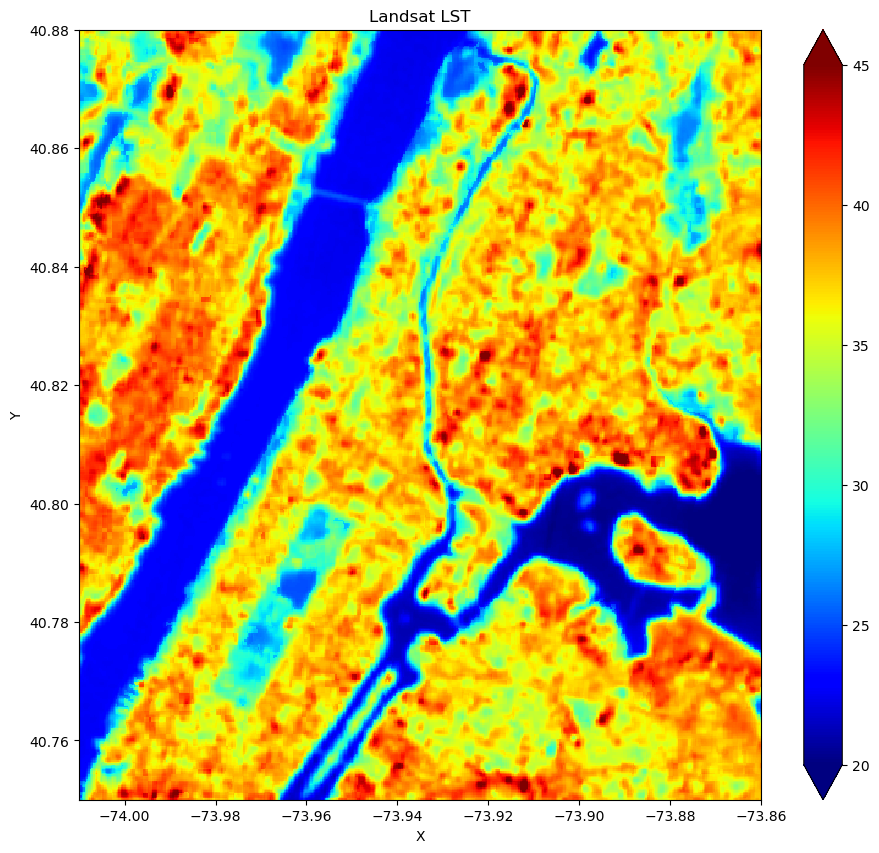

In [9]:
import rioxarray as rxr

import matplotlib.pyplot as plt

# Load the 'Landsat_LST.tiff' file
lst = rxr.open_rasterio("Landsat_LST.tiff", masked=True).squeeze()

# Plot the loaded data
plt.figure(figsize=(11, 10))
lst.plot(vmin = 20.0, vmax = 45.0,cmap='jet')
plt.title('Landsat LST')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

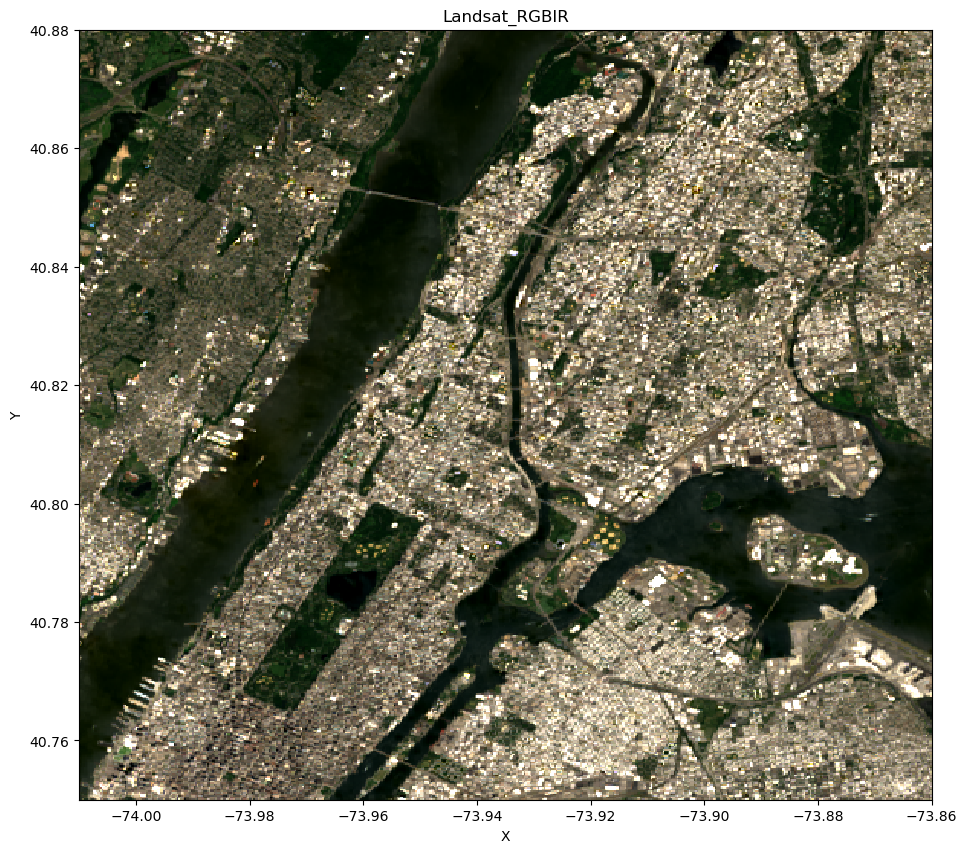

In [10]:
rgbir = rxr.open_rasterio("Landsat_RGBIR.tiff", masked=True).squeeze()

# Plot the loaded data
plt.figure(figsize=(11, 10))
rgbir[[0,1,2]].plot.imshow(robust=True)
plt.title('Landsat_RGBIR')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [11]:
rgbir

<xarray.DataArray (band: 4, y: 484, x: 558)> Size: 9MB
[1080288 values with dtype=float64]
Coordinates:
  * band         (band) int64 32B 1 2 3 4
  * x            (x) float64 4kB -74.01 -74.01 -74.01 ... -73.86 -73.86 -73.86
  * y            (y) float64 4kB 40.88 40.88 40.88 40.88 ... 40.75 40.75 40.75
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

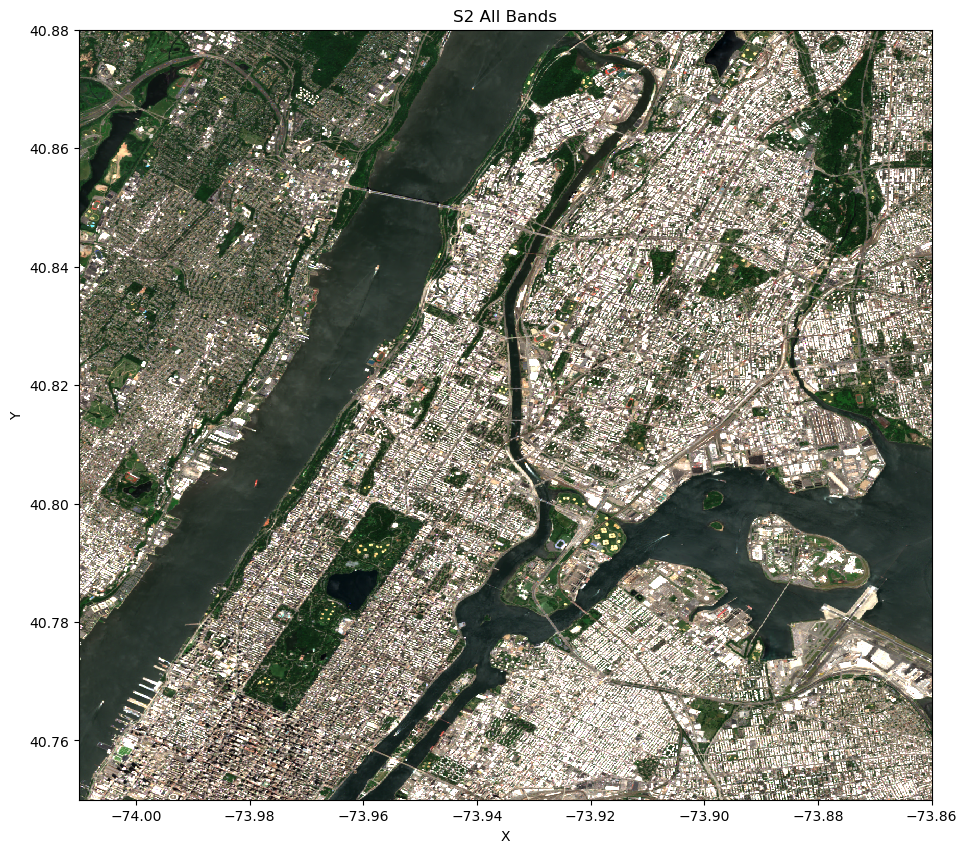

In [12]:
s2bands = rxr.open_rasterio("S2_all_bands.tiff", masked=True).squeeze()

# Plot the loaded data
plt.figure(figsize=(11, 10))
s2bands[[3,2,1]].plot.imshow(robust=True, vmin=0, vmax=2500)
plt.title('S2 All Bands')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [13]:
ndvi = (s2bands[7]-s2bands[3])/(s2bands[7]+s2bands[3]) #Vegetation Index
ndbi = (s2bands[10]-s2bands[7])/(s2bands[10]+s2bands[7]) #Buildup Index
ndwi = (s2bands[2]-s2bands[7])/(s2bands[2]+s2bands[7]) #Water Index 

In [14]:
ndvi

<xarray.DataArray (y: 1448, x: 1671)> Size: 19MB
array([[ 0.47080414,  0.47080414,  0.62461913, ...,  0.24917817,
         0.28494624,  0.36942675],
       [ 0.47459316,  0.47459316,  0.7615491 , ...,  0.27681221,
         0.31496063,  0.2638106 ],
       [ 0.49362245,  0.49362245,  0.77526821, ...,  0.53666582,
         0.56335878,  0.51512287],
       ...,
       [-0.14835787, -0.1422367 , -0.1422367 , ...,  0.03034682,
         0.04475524,  0.04475524],
       [-0.1416122 , -0.12831389, -0.12831389, ...,  0.04628502,
         0.06261181,  0.06261181],
       [-0.12169312, -0.08733624, -0.08733624, ...,  0.07830688,
         0.07921318,  0.07921318]])
Coordinates:
  * x            (x) float64 13kB -74.01 -74.01 -74.01 ... -73.86 -73.86 -73.86
  * y            (y) float64 12kB 40.88 40.88 40.88 40.88 ... 40.75 40.75 40.75
    spatial_ref  int64 8B 0

In [15]:
ndvi_df = ndvi.to_dataframe(name="ndvi")
ndbi_df = ndvi.to_dataframe(name="ndbi")
ndwi_df = ndvi.to_dataframe(name="ndwi")
lst_df = lst.to_dataframe(name="lst")



In [16]:
sentinel_df = pd.concat([ndvi_df, ndbi_df, ndwi_df], axis=1)

In [17]:
sentinel_df.drop(columns = ['spatial_ref'], inplace = True) 
lst_df.drop(columns = ['spatial_ref'], inplace = True)  

In [18]:
lst_df.drop(columns = ['band'], inplace =True)

In [19]:
spectral_df = sentinel_df.merge(lst_df, how = 'left', on = ['y','x'])

In [20]:
spectral_df.head()

ndvi      ndbi      ndwi  lst
y         x                                            
40.879955 -74.009955  0.470804  0.470804  0.470804  NaN
          -74.009865  0.470804  0.470804  0.470804  NaN
          -74.009776  0.624619  0.624619  0.624619  NaN
          -74.009686  0.498728  0.498728  0.498728  NaN
          -74.009596  0.237031  0.237031  0.237031  NaN

In [21]:
train_df  = pd.read_csv("Training_data_uhi_index_UHI2025-v2.csv")
train_df.head()

Longitude   Latitude          datetime  UHI Index
0 -73.909167  40.813107  24-07-2021 15:53   1.030289
1 -73.909187  40.813045  24-07-2021 15:53   1.030289
2 -73.909215  40.812978  24-07-2021 15:53   1.023798
3 -73.909242  40.812908  24-07-2021 15:53   1.023798
4 -73.909257  40.812845  24-07-2021 15:53   1.021634

In [22]:
mhtn_w = pd.read_csv("manhattan_weather.csv")
brnx_w = pd.read_csv("bronx_weather.csv")

mhtn_w.head()

Date / Time  Air Temp at Surface [degC]  \
0  2021-07-24 06:00:00 EDT                        21.3   
1  2021-07-24 06:05:00 EDT                        21.4   
2  2021-07-24 06:10:00 EDT                        21.4   
3  2021-07-24 06:15:00 EDT                        21.5   
4  2021-07-24 06:20:00 EDT                        21.5   

   Relative Humidity [percent]  Avg Wind Speed [m/s]  \
0                         66.5                   0.9   
1                         66.1                   1.1   
2                         66.5                   1.3   
3                         65.4                   1.3   
4                         65.0                   1.5   

   Wind Direction [degrees]  Solar Flux [W/m^2]  
0                       348                  10  
1                       345                  12  
2                         4                  14  
3                         5                  17  
4                       346                  19

In [23]:
train_df.datetime = pd.to_datetime(train_df.datetime, dayfirst=True)

In [24]:
train_df.datetime.min()

Timestamp('2021-07-24 15:01:00')

In [25]:
mhtn_w["Date / Time"] = pd.to_datetime(mhtn_w["Date / Time"].str.replace(" EDT", ""))
mhtn_w["Date / Time"].min()

Timestamp('2021-07-24 06:00:00')

In [26]:
brnx_w["Date / Time"] = pd.to_datetime(brnx_w["Date / Time"].str.replace(" EDT", ""))
brnx_w["Date / Time"].min()

Timestamp('2021-07-24 06:00:00')

In [27]:
# train_df1 = train_df.merge(mhtn_w, how = 'left', left_on = 'datetime', right_on = 'Date / Time').merge(brnx_w, how = 'left', left_on = 'datetime', right_on = 'Date / Time')
# train_df1.head()

In [28]:
df['lon1'] = df['Coordinates'].str.split(',').str[0].astype(float)
df['lat1'] = df['Coordinates'].str.split(',').str[1].str.split(' ').str[0].astype(float)

In [29]:
df['lon1_1'] = df['lon1'].apply(lambda x: round(x, 4))
df['lat1_1'] = df['lat1'].apply(lambda x: round(x, 4))

In [30]:
train_df['lon1_1'] = train_df['Longitude'].apply(lambda x: round(x, 4))
train_df['lat1_1'] = train_df['Latitude'].apply(lambda x: round(x, 4))

In [31]:
train_df1 = train_df.merge(df[['layer', 'lon1_1','lat1_1']].drop_duplicates(subset = ['lon1_1','lat1_1']), how = 'left', on = ['lon1_1','lat1_1'])
len(train_df1) == len(train_df)

True

In [32]:
train_df['lon1_2'] = train_df['Longitude'].apply(lambda x: round(x, 3))
train_df['lat1_2'] = train_df['Latitude'].apply(lambda x: round(x, 3))
train_df['lon1_3'] = train_df['Longitude'].apply(lambda x: round(x, 2))
train_df['lat1_3'] = train_df['Latitude'].apply(lambda x: round(x, 2))
train_df['lon1_4'] = train_df['Longitude'].apply(lambda x: round(x, 1))
train_df['lat1_4'] = train_df['Latitude'].apply(lambda x: round(x, 1))


In [33]:
df['lon1_2'] = df['lon1'].apply(lambda x: round(x, 3))
df['lat1_2'] = df['lat1'].apply(lambda x: round(x, 3))
df['lon1_3'] = df['lon1'].apply(lambda x: round(x, 2))
df['lat1_3'] = df['lat1'].apply(lambda x: round(x, 2))
df['lon1_4'] = df['lon1'].apply(lambda x: round(x, 1))
df['lat1_4'] = df['lat1'].apply(lambda x: round(x, 1))

In [34]:
spectral_df= spectral_df.reset_index()

([<matplotlib.axis.YTick at 0x1978aa52e50>,
 [Text(0, 0.956121565, '0.95612'),
  Text(0, 0.966121565, '0.96612'),
  Text(0, 0.976121565, '0.97612'),
  Text(0, 0.986121565, '0.98612'),
  Text(0, 0.996121565, '0.99612'),
  Text(0, 1.006121565, '1.00612'),
  Text(0, 1.0161215650000002, '1.01612'),
  Text(0, 1.026121565, '1.02612'),
  Text(0, 1.0361215650000002, '1.03612')])

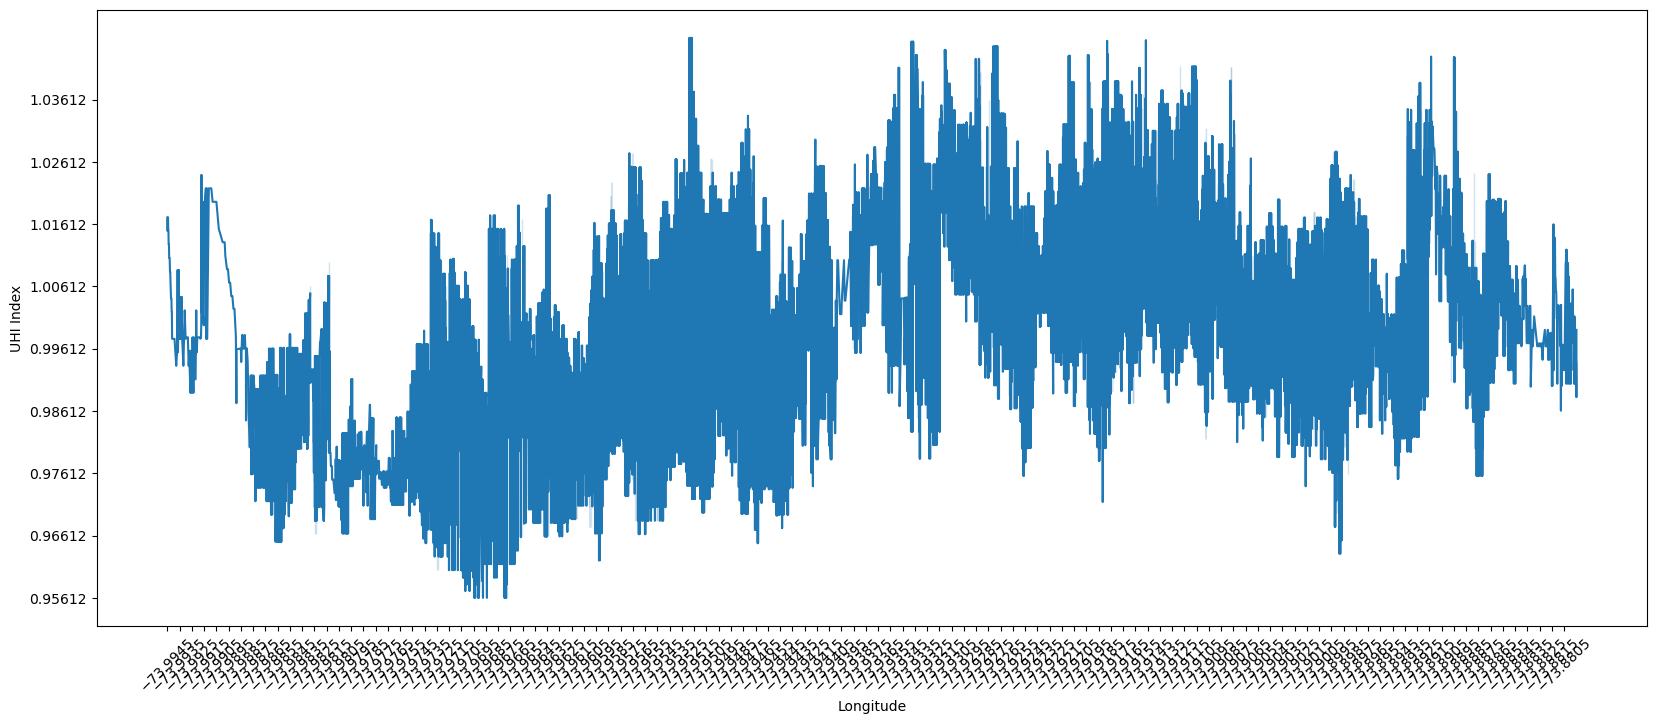

In [35]:
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.lineplot(data = train_df, x = 'Longitude', y = 'UHI Index',)
plt.xticks(np.arange(train_df['Longitude'].min(), train_df['Longitude'].max(), .001), rotation = 45)
plt.yticks(np.arange(train_df['UHI Index'].min(), train_df['UHI Index'].max(), .01))

In [53]:
spectral_df['x'][202]

np.float64(-73.99182226211849)

In [60]:
train_df['Longitude'][(train_df['Longitude'] > -73.99182) & (train_df['Longitude'] < -73.99180)]

1439   -73.991803
Name: Longitude, dtype: float64

In [38]:
train_df['Longitude'].sort_values()[:10]

1424   -73.994457
1423   -73.994443
1422   -73.994430
1421   -73.994415
1420   -73.994400
1419   -73.994383
1418   -73.994368
1417   -73.994350
1416   -73.994327
1415   -73.994308
Name: Longitude, dtype: float64

In [39]:
spectral_df['x'] = spectral_df['x'].apply(lambda x : round(x, 6))
spectral_df['y'] = spectral_df['y'].apply(lambda x : round(x, 6))
train_df1['Longitude'] = train_df1['Longitude'].apply(lambda x : round(x, 6))
train_df1['Latitude'] = train_df1['Latitude'].apply(lambda x : round(x, 6))
train_df2 = train_df1.merge(spectral_df, how = 'left', left_on = ['Longitude','Latitude'], right_on = ['x','y'], validate = '1:1')
train_df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11229 entries, 0 to 11228
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Longitude  11229 non-null  float64       
 1   Latitude   11229 non-null  float64       
 2   datetime   11229 non-null  datetime64[ns]
 3   UHI Index  11229 non-null  float64       
 4   lon1_1     11229 non-null  float64       
 5   lat1_1     11229 non-null  float64       
 6   layer      135 non-null    object        
 7   y          2 non-null      float64       
 8   x          2 non-null      float64       
 9   ndvi       2 non-null      float64       
 10  ndbi       2 non-null      float64       
 11  ndwi       2 non-null      float64       
 12  lst        0 non-null      float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 1.1+ MB


In [43]:
spectral_df2 = spectral_df.copy()
spectral_df2['x'] = spectral_df2['x'].apply(lambda x : round(x, 5))
spectral_df2['y'] = spectral_df2['y'].apply(lambda x : round(x, 5))
train_df1['Longitude'] = train_df1['Longitude'].apply(lambda x : round(x, 5))
train_df1['Latitude'] = train_df1['Latitude'].apply(lambda x : round(x, 5))
train_df2 = train_df1.merge(spectral_df2, how = 'left', left_on = ['Longitude','Latitude'], right_on = ['x','y'], validate = '1:m')
train_df2.info()

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

In [41]:
train_df2.dropna(subset = ['ndvi'])

Longitude   Latitude            datetime  UHI Index   lon1_1   lat1_1  \
2286 -73.953223  40.768270 2021-07-24 15:21:00   0.984009 -73.9532  40.7683   
3230 -73.912020  40.844852 2021-07-24 15:57:00   1.007089 -73.9120  40.8449   

     layer          y          x      ndvi      ndbi      ndwi  lst  
2286   NaN  40.768270 -73.953223  0.587419  0.587419  0.587419  NaN  
3230   NaN  40.844852 -73.912020  0.082007  0.082007  0.082007  NaN

In [40]:
spectral_df['x'].sort_values()[:10]

1274973   -74.009955
2282586   -74.009955
1869849   -74.009955
1378575   -74.009955
1498887   -74.009955
1423692   -74.009955
599889    -74.009955
237282    -74.009955
698478    -74.009955
1517268   -74.009955
Name: x, dtype: float64